<a href="https://colab.research.google.com/github/IvanKatorgin/Big-Data-Analytics/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D1%82%D0%B8%D0%BA%D0%B0_%D0%B1%D0%BE%D0%BB%D1%8C%D1%88%D0%B8%D1%85_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B8%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%87%D0%B0%D1%81%D1%82%D1%8C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Аналитика больших данных". Итоговая работа. Каторгин И.П.

Практика Python

Часть 1

В данном разделе мы выступим в роли data scientist и попытаемся построить простую модель для рекомендации фильмов пользователям

Задание 1. Загрузите в колаб файлы по оценкам (ratings) и фильмам (movies) и создайте на их основе pandas-датафреймы

In [ ]:
import pandas as pd

In [ ]:
column_names_1 = ['user id', 'item id', 'rating', 'timestamp']

In [ ]:
ratings = pd.read_csv('u.data.csv', encoding = "utf-8", sep = '\t', header = None, names = column_names_1)
ratings.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
column_names_2 = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [ ]:
movies = pd.read_csv('u.item.csv', encoding = "ISO-8859-1", sep = '|', header = None, names = column_names_2, na_values = '?')
movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Сформировав общий топ фильмов в прошлой практике, мы хотим сделать шаг вперед и начать советовать пользователю те фильмы, которые могли бы быть для него наиболее интересны. Наша цель - научится предсказывать оценку фильма пользователем. Для тестирования модели найдем пользователя, который поставил больше всего оценок

Задание 2. Средствами Pandas, используя dataframe ratings, найдите id пользователя, поставившего больше всего оценок

In [ ]:
ratings.groupby(['user id'])['rating'].count().reset_index().sort_values(by='rating', ascending=False).head(1)

,user id,rating
404,405,737


Отберем фильмы, которые оценил данный пользователь

Задание 3. Оставьте в датафрейме ratings только те фильмы, который оценил данный пользователь

In [ ]:
df_ratings = ratings.loc[ratings['user id'] == 405]
df_ratings

,user id,item id,rating,timestamp
12276,405,56,4,885544911
12383,405,592,1,885548670
12430,405,1582,1,885548670
12449,405,171,1,885549544
12460,405,580,1,885547447
...,...,...,...,...
98956,405,375,1,885546835
98978,405,445,4,885548435
99148,405,1246,1,885547735
99465,405,196,1,885546112


Для построения модели нам нужны признаки. В качестве таковых будем использовать:
- Год выхода
- Жанры
- Общее количество оценок
- Суммарную оценку

Задание 4. Добавьте к датафрейму из задания 3 столбцы:
- По жанрам. Каждый столбец - это жанр. Единицу записываем, если фильм принадлежит данному жанру и 0 - если нет
- столбцы с общим количеством оценок от всех пользователей на фильм и суммарной оценкой от всех пользователей


комментарий:

поскольку, скорее всего, столбец 'item id' в файле 'u.data.csv' соответствует столбцу 'movie id' файла 'u.item.csv', то произведем переименование столбца 'item id' в 'movie id' для последующего корректного объединения двух таблиц

In [ ]:
df_ratings.rename(columns = {'item id':'movie id'}, inplace = True)
df_ratings

<ipython-input-8-02f6c98cdc27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings.rename(columns = {'item id':'movie id'}, inplace = True)


,user id,movie id,rating,timestamp
12276,405,56,4,885544911
12383,405,592,1,885548670
12430,405,1582,1,885548670
12449,405,171,1,885549544
12460,405,580,1,885547447
...,...,...,...,...
98956,405,375,1,885546835
98978,405,445,4,885548435
99148,405,1246,1,885547735
99465,405,196,1,885546112


In [ ]:
movies['release year'] = pd.DatetimeIndex(movies['release date']).year
movies

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998.0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998.0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998.0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1994.0


In [ ]:
# общее количество оценок по фильмам
rating_count = ratings.groupby(['item id'])['rating'].count().reset_index()
rating_count.rename(columns = {'item id':'movie id', 'rating': 'rating_count'}, inplace = True)
rating_count

,movie id,rating_count
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86
...,...,...
1677,1678,1
1678,1679,1
1679,1680,1
1680,1681,1


In [ ]:
# суммарные оценки по фильмам
rating_sum = ratings.groupby(['item id'])['rating'].sum().reset_index()
rating_sum.rename(columns = {'item id':'movie id', 'rating': 'rating_sum'}, inplace = True)
rating_sum

,movie id,rating_sum
0,1,1753
1,2,420
2,3,273
3,4,742
4,5,284
...,...,...
1677,1678,1
1678,1679,3
1679,1680,2
1680,1681,3


In [ ]:
df_ratings = (df_ratings
              .merge(movies, on = 'movie id', how = 'left')
              .merge(rating_count, on = 'movie id', how = 'left')
              .merge(rating_sum, on = 'movie id', how = 'left'))
df_ratings

,user id,movie id,rating,timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year,rating_count,rating_sum
0,405,56,4,885544911,Pulp Fiction (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Pulp%20Fictio...,0,0,...,0,0,0,0,0,0,0,1994.0,394,1600
1,405,592,1,885548670,True Crime (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?True%20Crime%...,0,0,...,0,1,0,0,1,0,0,1995.0,9,30
2,405,1582,1,885548670,T-Men (1947),01-Jan-1947,NaN,http://us.imdb.com/M/title-exact?T-Men%20(1947),0,0,...,0,0,0,0,0,0,0,1947.0,1,1
3,405,171,1,885549544,Delicatessen (1991),01-Jan-1991,NaN,http://us.imdb.com/M/title-exact?Delicatessen%...,0,0,...,0,0,0,1,0,0,0,1991.0,65,252
4,405,580,1,885547447,"Englishman Who Went Up a Hill, But Came Down a...",01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Englishman%20...,0,0,...,0,0,1,0,0,0,0,1995.0,32,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,405,375,1,885546835,Showgirls (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Showgirls%20(...,0,0,...,0,0,0,0,0,0,0,1995.0,23,45
733,405,445,4,885548435,"Body Snatcher, The (1945)",01-Jan-1945,NaN,http://us.imdb.com/M/title-exact?Body%20Snatch...,0,0,...,0,0,0,0,0,0,0,1945.0,22,77
734,405,1246,1,885547735,Bushwhacked (1995),01-Jan-1995,NaN,http://us.imdb.com/Title?Bushwhacked+(1995/I),0,0,...,0,0,0,0,0,0,0,1995.0,7,11
735,405,196,1,885546112,Dead Poets Society (1989),01-Jan-1989,NaN,http://us.imdb.com/M/title-exact?Dead%20Poets%...,0,0,...,0,0,0,0,0,0,0,1989.0,251,983


In [ ]:
#оставляем только нужные столбцы для модели
df_ratings.drop(['movie title', 'release date', 'video release date', 'IMDb URL'], axis=1, inplace=True)
df_ratings

,user id,movie id,rating,timestamp,unknown,Action,Adventure,Animation,Children's,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year,rating_count,rating_sum
0,405,56,4,885544911,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1994.0,394,1600
1,405,592,1,885548670,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1995.0,9,30
2,405,1582,1,885548670,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1947.0,1,1
3,405,171,1,885549544,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1991.0,65,252
4,405,580,1,885547447,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1995.0,32,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,405,375,1,885546835,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1995.0,23,45
733,405,445,4,885548435,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1945.0,22,77
734,405,1246,1,885547735,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1995.0,7,11
735,405,196,1,885546112,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1989.0,251,983


Теперь все готово и можно строить модель

Задание 5. Сформируйте X_train, X_test, y_train, y_test

In [ ]:
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# формирование выбороки и целевой переменной
df_model = df_ratings.loc[ : , df_ratings.columns != 'rating' ]
data_target = pd.array(df_ratings['rating'])

In [ ]:
# разделим выборку на тренировочную и тестовую
x_train, x_test, y_train, y_test = train_test_split(df_model, data_target, train_size=0.2)

Задание 6. Возьмите модель линейной регрессии (или любую другую для задачи регрессии) и обучите ее на фильмах

Построим модель LDA (Линейный дискриминантный анализ)

In [ ]:
# обучаем модель
lda = LinearDiscriminantAnalysis()

In [ ]:
# получаем коэфф. модели
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
y_pred = lda.predict(x_test)
y_pred

array([1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1,
       1, 4, 1, 4, 1, 5, 1, 1, 1, 1, 1, 1, 4, 1, 1, 5, 1, 1, 1, 1, 1, 1,
       1, 1, 5, 1, 5, 1, 1, 1, 4, 3, 1, 4, 1, 1, 3, 1, 1, 1, 1, 4, 1, 3,
       1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 2, 1, 5, 1, 1, 1, 5, 1, 1, 5, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 3, 2, 1, 1,
       1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 5, 4, 1, 1, 5, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 5, 1, 1, 4, 4, 1, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 1, 5, 4, 1, 5, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 5, 3, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,

Text(0.5, 1.0, 'визуализация модели')

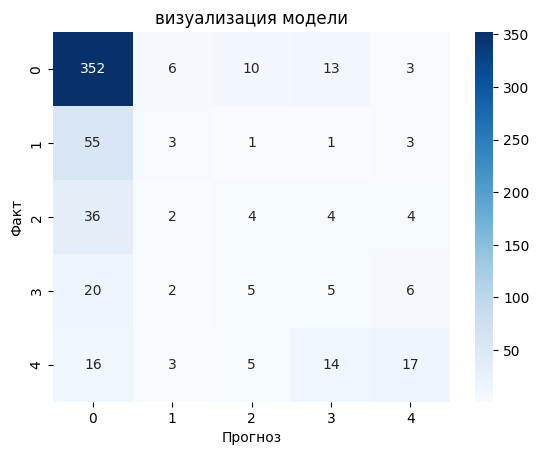

In [ ]:
# визуализируем результаты
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
plt.xlabel('Прогноз')
plt.ylabel('Факт')
plt.title('визуализация модели')

Задание 7. Оцените качество модели на X_test, y_test при помощи метрик для задачи регрессии

In [ ]:
# точность модели
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.6457627118644068

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='weighted')

0.5926885738343588

Точность модели LDA accuracy = 0,6457, значение F-мера = 0,5926. На выходе получили не совсем точную модель для предсказания событий (точность предсказания 59,26%).

Дополнительно построим модель предсказания LR, с помощью логистической регрессии и оценим ее точность

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lr.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# точность модели
accuracy_score(y_test, lr.predict(x_test))

0.6508474576271186

In [ ]:
f1_score(y_test, lr.predict(x_test), average='weighted')

0.513193888560192

Точность модели LR accuracy = 0,6508, значение F-мера = 0,5131. Показатели точности модели LR не сильно отличаются от модели LDA

Выводы:
- в работе был найден пользователь, поставивший больше всего оценок фильмам;
- по данному пользователю были построены модели LDA и LR для предсказания того, какую оценку фильму поставит пользователь;
- по обеим моделям были выполнены оценки точности, которые показали схожие результаты с точностью предсказаний на уровне 60%

Вторая часть в ноутбуке "Аналитика_больших_данных_итоговая_работа_часть_2"